In [1]:
!pip install dash

In [2]:
from dash import Dash, html, dcc, callback, Output, Input
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\karik\AppData\Local\Temp\ipykernel_14984\459564320.py:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\karik\AppData\Local\Temp\ipykernel_14984\459564320.py:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [3]:
df = pd.read_csv('Womens_clothing.csv')

In [4]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [6]:
df.shape

(23486, 11)

In [7]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [8]:
# Replace missing values in the 'Title' column with 'No Title'
df['Title'] = df['Title'].fillna('No Title')

# Replace missing values in the 'Review Text' column with 'No Review'
df['Review Text'] = df['Review Text'].fillna('No Review')

# Replace missing values in the columns 'Division Name', 'Department Name', 'Class Name' with 'Unknown'
for column in ['Division Name', 'Department Name', 'Class Name']:
    df[column] = df[column].fillna('Unknown')

In [9]:
print(df[['Title', 'Review Text', 'Division Name', 'Department Name', 'Class Name']].isnull().sum())

Title              0
Review Text        0
Division Name      0
Department Name    0
Class Name         0
dtype: int64


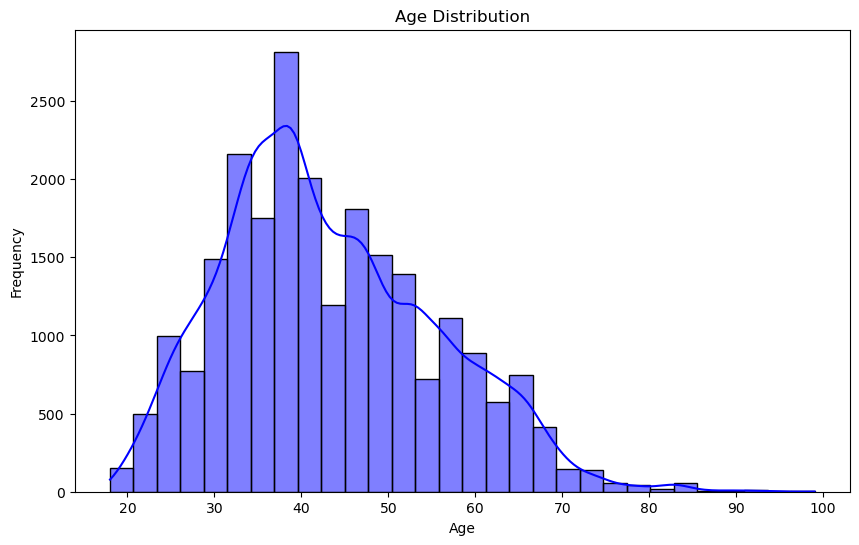

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## DASHBOARD 

by Plotly

In [25]:

# Focar na faixa etária de 18 a 30 anos
data_filtered = df[(df['Age'] >= 18) & (df['Age'] <= 35)]

In [26]:
app = dash.Dash(__name__)

In [27]:
df = df[(df['Age'] >= 18) & (df['Age'] <= 35)]

In [28]:
# Define o layout do app
app.layout = html.Div([
    html.H1("Dashboard de Análise de Compras de Roupas"),

    html.Div([
        html.Label("Selecione o Departamento:"),
        dcc.Dropdown(
            id='department-dropdown',
            options=[{'label': name, 'value': name} for name in df['Department Name'].unique()],
            value=df['Department Name'].unique()[0],
            clearable=False
        ),
    ], style={'padding': 10}),

    html.Div([
        html.Label("Intervalo de Idade:"),
        dcc.RangeSlider(
            id='age-slider',
            min=df['Age'].min(),
            max=df['Age'].max(),
            value=[df['Age'].min(), df['Age'].max()],
            marks={i: str(i) for i in range(df['Age'].min(), df['Age'].max()+1, 5)},
            step=1
        )
    ], style={'padding': 10}),

    dcc.Graph(id='clothing-distribution')
])

# Callback to update the graph based on user inputs
@app.callback(
    Output('clothing-distribution', 'figure'),
    [Input('department-dropdown', 'value'),
     Input('age-slider', 'value')]
)
def update_graph(selected_department, age_range):
    # Filter data based on user input
    filtered_df = df[(df['Department Name'] == selected_department) &
                         (df['Age'] >= age_range[0]) & (df['Age'] <= age_range[1])]
    
    # Create a bar chart for the distribution of clothing IDs
    fig = px.histogram(filtered_df, x='Clothing ID',
                       title=f'Distribuição de IDs de Roupas para o Departamento: {selected_department}',
                       labels={'Clothing ID': 'ID do Produto'})
    return fig

# Run the server
if __name__ == '__main__':
    app.run_server(debug=True)